<a href="https://colab.research.google.com/github/pritiyadav888/Machine-Learning-Projects/blob/main/face_recognition_olivetti_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit-  [link text](https://github.com/oanhdoan0601)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the Dataset 

In [ ]:
# Input data files consisting of the images
data = np.load("/content/drive/MyDrive/Colab Notebooks/Predictive_Data/olivetti_faces.npy")
target = np.load("/content/drive/MyDrive/Colab Notebooks/Predictive_Data/olivetti_faces_target.npy")

### Print the Shape

In [ ]:
print("data shape: ", data.shape)
print("target shape: ", target.shape)

data shape:  (400, 64, 64)
target shape:  (400,)


**Print the images**

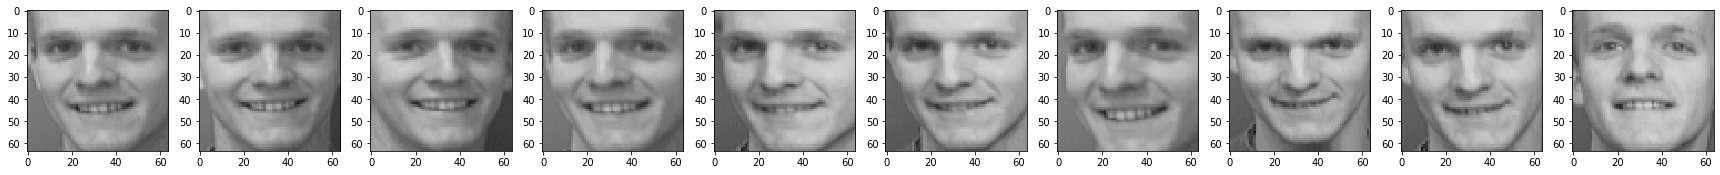

In [ ]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(24,24))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=data[i+40] # 4th subject
    imshow(x)
plt.show()

**Unique Faces in Dataset bold text**

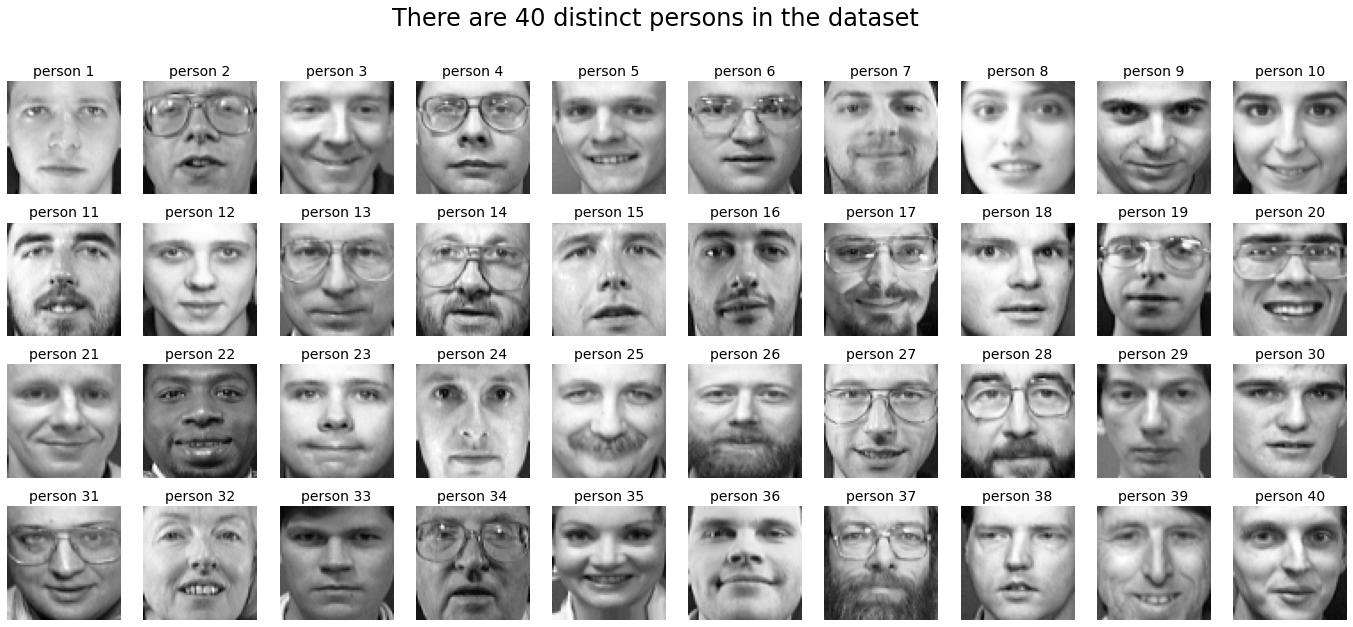

In [ ]:
fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = data[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()

**Preprocessing**

In [ ]:
#Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

Y = target.reshape(-1,1) # store labels in Y
X=data.reshape(data.shape[0], data.shape[1]*data.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400, 1)


Split the dataset

In [ ]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [ ]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

**Logistic Regression**

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LR_accuracy = round(lr.score(x_test, y_test)*100,2)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)
y_pred = lr.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy with Logistic Regression

In [ ]:
print("LR_accuracy is %", LR_accuracy)

LR_accuracy is % 96.25


**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


Accuracy with RF

In [ ]:
print("RF_accuracy is %", RF_accuracy)

RF_accuracy is % 93.75


**K-Neighbour Clasifier **

In [ ]:
Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)


list_names.append("KNN")
list_accuracy.append(Knn_accuracy)


y_pred = Knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


confusion matrix:
[[1 0 0 ... 1 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


Accuracy with KNN

In [ ]:
print("Knn_accuracy is %", Knn_accuracy)


Knn_accuracy is % 91.25


**Support Vector Machine**

In [ ]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)
svm_accuracy = round(svm.score(x_test,y_test)*100,2)


y_pred = svm.predict(x_test)


# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)


list_names.append("SVM")
list_accuracy.append(svm_accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


Accuracy with SVM

In [ ]:
print("SVM_accuracy is %",svm_accuracy)

SVM_accuracy is % 97.5


**Gaussian Naive Bayes**

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_accuracy = round(nb.score(x_test,y_test)*100,2)

# Predicting the Test set results
y_pred = nb.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)
list_names.append("Naive_Bayes")
list_accuracy.append(nb_accuracy)

confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with GNB

In [ ]:
print("Naive_Bayes_accuracy is %",nb_accuracy)

Naive_Bayes_accuracy is % 87.5


In [ ]:
df = pd.DataFrame({'METHOD': list_names_pca, 'ACCURACY (%)': list_accuracy_pca})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,Naive_Bayes,90.00
1,Random Forest,91.25
2,KNN,92.50
3,Logistic Regression,96.25
4,SVM,97.50


In [ ]:
#from sklearn.decomposition import PCA

pca = PCA(100)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


print('Original dataset:',x_train.shape)
print('Dataset after applying PCA:',X_train_pca.shape)
print('No of PCs/Eigen Faces:',len(pca.components_))
print('Eigen Face Dimension:',pca.components_.shape)
print('Variance Captured:',np.sum(pca.explained_variance_ratio_))

Original dataset: (320, 4096)
Dataset after applying PCA: (320, 100)
No of PCs/Eigen Faces: 100
Eigen Face Dimension: (100, 4096)
Variance Captured: 0.9426252


Text(0.5, 1.0, 'Average Face')

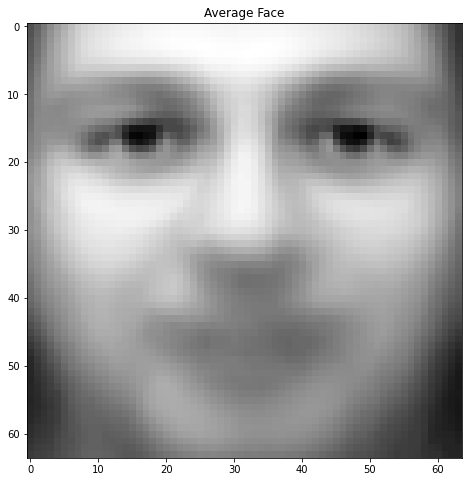

In [ ]:
# Average face of the samples

plt.subplots(1,1,figsize=(8,8))
plt.imshow(pca.mean_.reshape((64,64)), cmap="gray")
plt.title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

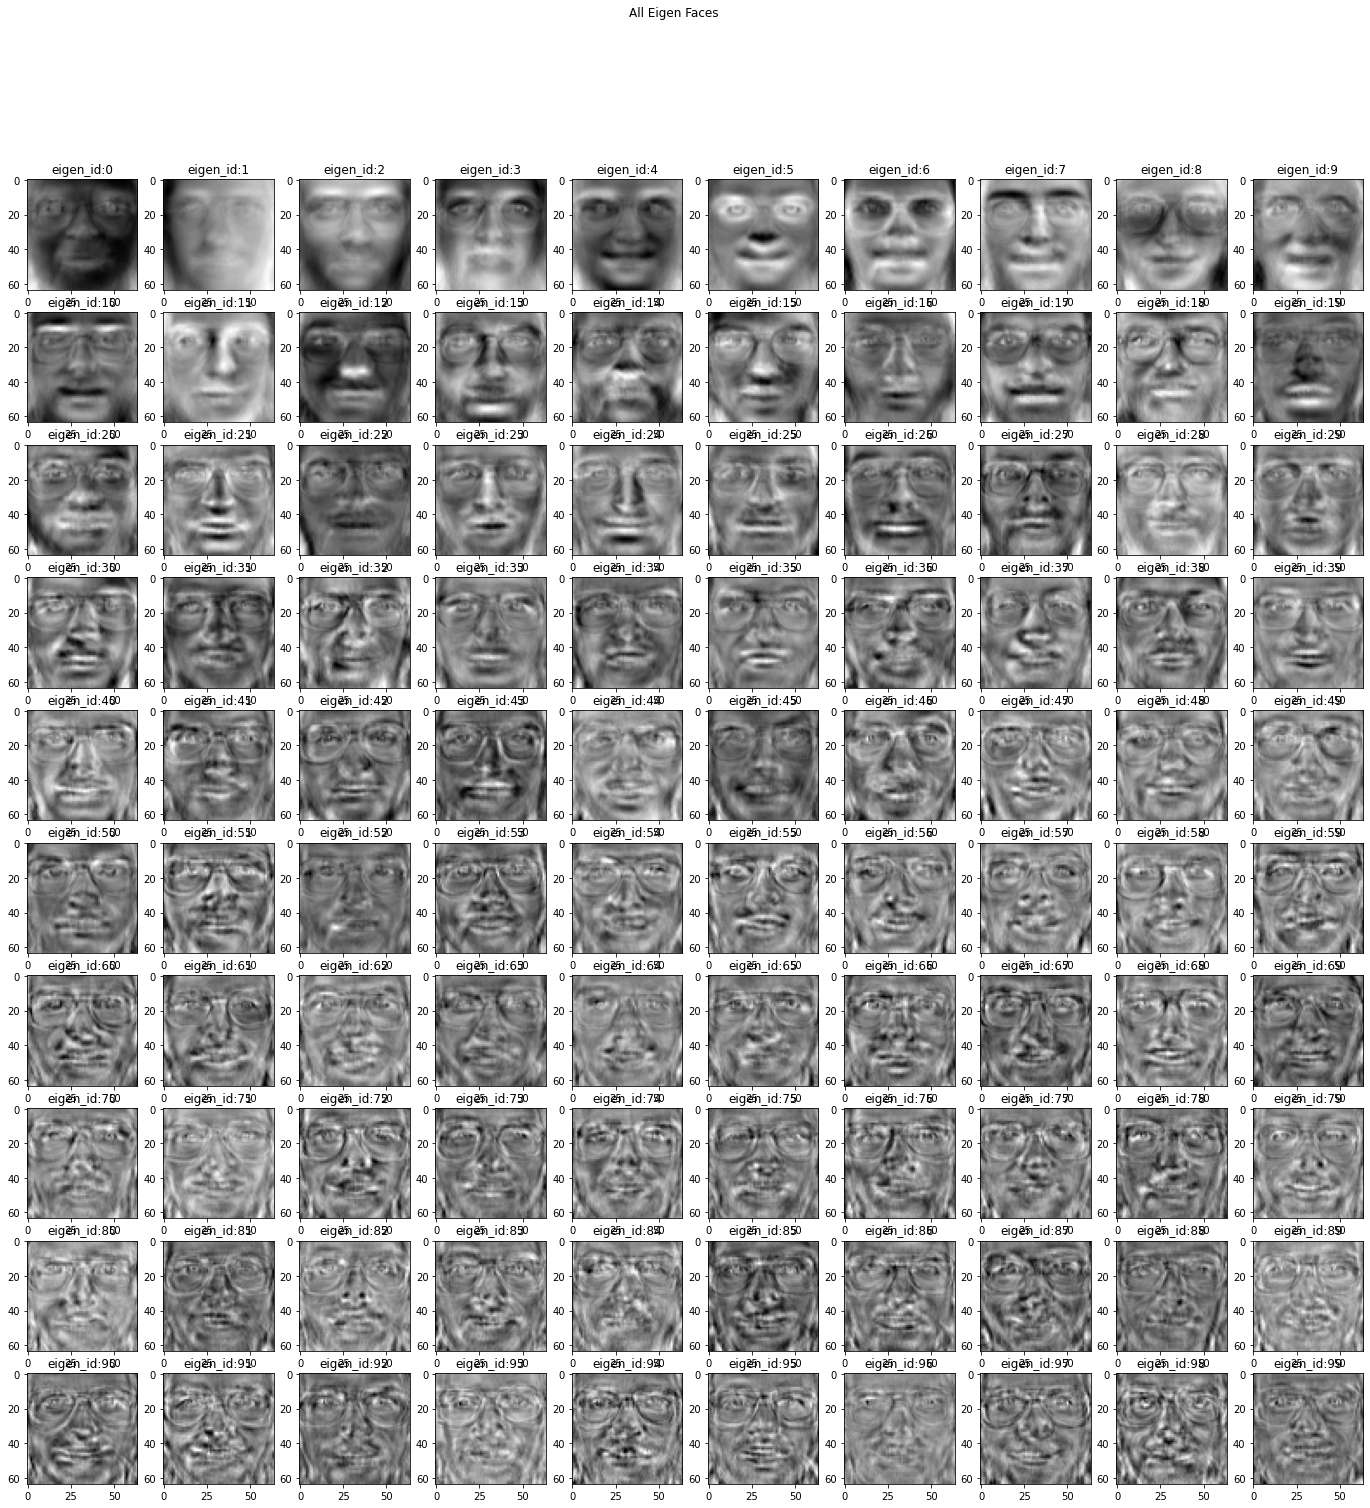

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

columns=10
rows=int(number_of_eigenfaces/columns)
fig, axarr=plt.subplots(nrows=rows, ncols=columns, figsize=(24,24))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")

    axarr[i].set_title("eigen_id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
# Store accuracies of the machine learning methods for comparison at the end
list_names_pca = []
list_accuracy_pca = []

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)

LR_accuracy = round(lr.score(X_test_pca, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names_pca.append("Logistic Regression")
list_accuracy_pca.append(LR_accuracy)
y_pred = lr.predict(X_test_pca)


from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_accuracy is % 96.25
confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(X_train_pca, y_train)
RF_accuracy = round(rf.score(X_test_pca, y_test)*100,2)

y_pred = rf.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("RF_accuracy is %", RF_accuracy)

list_names_pca.append("Random Forest")
list_accuracy_pca.append(RF_accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


confusion matrix:
[[2 0 0 ... 0 0 1]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]
RF_accuracy is % 92.5


In [ ]:
Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(X_train_pca, y_train)
Knn_accuracy = round(Knn.score(X_test_pca, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names_pca.append("KNN")
list_accuracy_pca.append(Knn_accuracy)

y_pred = Knn.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

Knn_accuracy is % 92.5
confusion matrix:
[[1 0 0 ... 1 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train_pca, y_train)
svm_accuracy = round(svm.score(X_test_pca,y_test)*100,2)



y_pred = svm.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("SVM_accuracy is %",svm_accuracy)
list_names_pca.append("SVM")
list_accuracy_pca.append(svm_accuracy)

confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]
SVM_accuracy is % 97.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
nb_accuracy = round(nb.score(X_test_pca,y_test)*100,2)

# Predicting the Test set results
y_pred = nb.predict(X_test_pca)

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("Naive_Bayes_accuracy is %",nb_accuracy)
list_names_pca.append("Naive_Bayes")
list_accuracy_pca.append(nb_accuracy)

confusion matrix:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]
Naive_Bayes_accuracy is % 90.0


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df = pd.DataFrame({'METHOD': list_names_pca, 'ACCURACY (%)': list_accuracy_pca})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,Naive_Bayes,90.00
1,Random Forest,92.50
2,KNN,92.50
3,Logistic Regression,96.25
4,SVM,97.50
